In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df1=df.drop(["id"],axis=1)

In [6]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df1["bmi"]=df1.bmi.fillna(df1.bmi.mean())

In [8]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
df1.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
r=df1[df1.stroke==0]

In [11]:
g=r.sample(500)

In [12]:
g.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
569,Female,32.0,0,0,No,Self-employed,Urban,65.30,40.4,never smoked,0
4762,Female,76.0,1,0,Yes,Self-employed,Urban,78.68,23.3,never smoked,0
3687,Female,69.0,0,0,Yes,Self-employed,Urban,79.70,25.0,never smoked,0
4414,Female,38.0,0,0,Yes,Private,Urban,77.20,23.4,Unknown,0
1224,Male,65.0,0,0,Yes,Private,Urban,88.57,29.0,smokes,0


In [13]:
g.index

Int64Index([ 569, 4762, 3687, 4414, 1224, 4288, 2490, 2089, 2719,  604,
            ...
            4295, 1268, 2972, 2919, 1116, 2226, 3688, 4947,  408, 1028],
           dtype='int64', length=500)

In [14]:
df2=df1.drop(g.index,axis=0)

In [15]:
df3=df2.reset_index()

In [16]:
df4=df3.drop("index",axis=1)

In [17]:
df4.stroke.value_counts()

0    4361
1     249
Name: stroke, dtype: int64

In [18]:
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
col=["gender","ever_married","work_type","Residence_type","smoking_status"]
for i in col:
    print(df4[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [20]:
df4.smoking_status=df4.smoking_status.apply(lambda x:"prefer not to say" if x=="Unknown" else x)

In [21]:
col=["gender","ever_married","work_type","Residence_type","smoking_status"]
dic={}
for i in col:
    dic[i]=list(df4[i].unique())

In [22]:
print(dic)

{'gender': ['Male', 'Female', 'Other'], 'ever_married': ['Yes', 'No'], 'work_type': ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], 'Residence_type': ['Urban', 'Rural'], 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'prefer not to say']}


In [23]:
df4.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000,4610.000000
mean,43.382733,0.096529,0.055315,106.357505,28.902400,0.054013
std,22.665024,0.295348,0.228618,45.515422,7.686773,0.226068
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.322500,23.725000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.337500,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [24]:
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [25]:
num_cols = ['age','bmi','avg_glucose_level']

In [26]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df4.index[(df4[column] <lower_bound) | (df4[column] > upper_bound)]
    return ls

In [27]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(df4,column))
index_list = sorted(set(index_list))

In [28]:
df4.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [29]:
before_remove = df4.shape

df5 =df4.drop(index_list,axis=0)
after_remove = df5.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (4610, 11)
Shape of data after remove : (3958, 11)


In [30]:
4610-3963

647

In [31]:
df6=df5.reset_index()

In [32]:
df6.head()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,prefer not to say,1
4,9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,prefer not to say,1


In [33]:
x=df6.drop(["stroke","index"],axis=1)

In [34]:
y=df6["stroke"]

In [35]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,prefer not to say
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,prefer not to say


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [37]:
x["gender"]=x.gender.apply(lambda res:1 if res=="female" else 0)
x["ever_married"]=x.ever_married.apply(lambda res1:1 if res1=="Yes" else 0)
x["Residence_type"]=x.Residence_type.apply(lambda res2:1 if res2=="Urban" else 0)

In [38]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
1,0,74.0,1,1,1,Private,0,70.09,27.400000,never smoked
2,0,69.0,0,0,0,Private,1,94.39,22.800000,never smoked
3,0,59.0,0,0,1,Private,0,76.15,28.893237,prefer not to say
4,0,78.0,0,0,1,Private,1,58.57,24.200000,prefer not to say


In [39]:
import seaborn as sns

(array([ 17., 207., 463., 738., 988., 683., 423., 241., 135.,  63.]),
 array([10.3 , 14.02, 17.74, 21.46, 25.18, 28.9 , 32.62, 36.34, 40.06,
        43.78, 47.5 ]),
 <BarContainer object of 10 artists>)

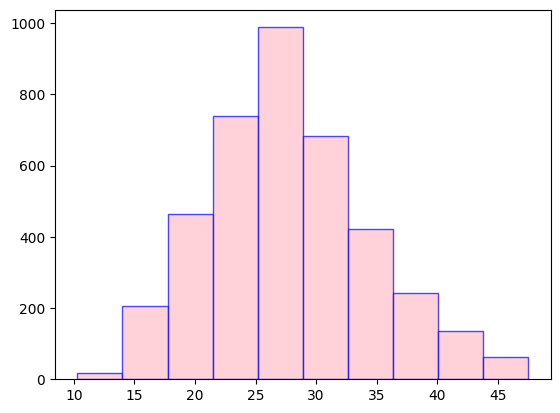

In [40]:
plt.hist(x.bmi,edgecolor="blue",alpha=0.7,color="pink")

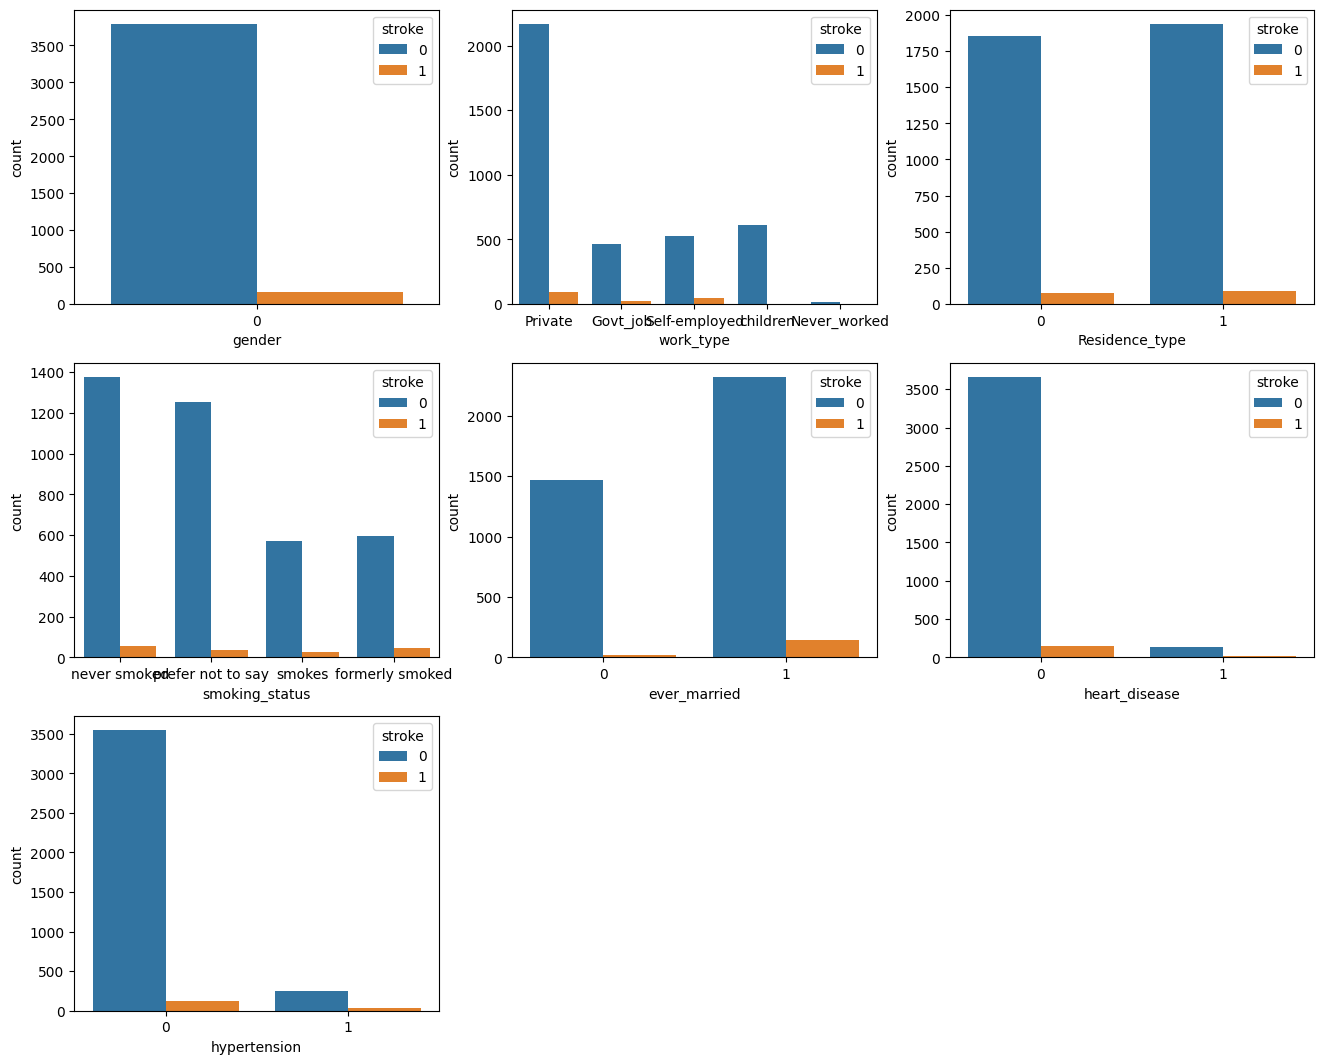

In [41]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=x[cols[i]],hue =y)

In [42]:
from sklearn.compose import ColumnTransformer
cv=ColumnTransformer([
    ("OneHot",OneHotEncoder(),[5,9]),
    ("MinMax",MinMaxScaler(),[1]),
    ("Standard",StandardScaler(),[7,8])
],remainder="passthrough")
X=cv.fit_transform(x)

In [43]:
X1=pd.DataFrame(X)

In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [45]:
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.975586,0.639671,0.704397,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.902344,-0.941549,-0.067405,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.841309,0.130839,-0.763541,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.719238,-0.674114,0.158572,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.951172,-1.449941,-0.551674,0.0,0.0,0.0,1.0,1.0


In [46]:
y.value_counts()

0    3793
1     165
Name: stroke, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
f=SMOTE(sampling_strategy="minority")
x_smote,y_smote=f.fit_resample(X1,y)

In [48]:
y_smote.value_counts()

1    3793
0    3793
Name: stroke, dtype: int64

In [49]:
x_smote

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.975586,0.639671,0.704397,0.0,0.000000,1.0,1.000000,0.000000
1,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.902344,-0.941549,-0.067405,0.0,1.000000,1.0,1.000000,0.000000
2,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.841309,0.130839,-0.763541,0.0,0.000000,0.0,0.000000,1.000000
3,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.719238,-0.674114,0.158572,0.0,0.000000,0.0,1.000000,0.000000
4,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.951172,-1.449941,-0.551674,0.0,0.000000,0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,0.093302,0.0,0.906698,0.0,0.0,0.000000,1.000000,0.0,0.0,0.971527,-1.383532,0.806095,0.0,0.093302,0.0,1.000000,0.000000
7582,0.000000,0.0,1.000000,0.0,0.0,0.777859,0.222141,0.0,0.0,0.608006,-0.175587,1.894931,0.0,0.000000,0.0,0.777859,1.000000
7583,0.259957,0.0,0.740043,0.0,0.0,0.000000,0.000000,1.0,0.0,0.857431,0.653253,0.143102,0.0,0.000000,0.0,1.000000,1.000000
7584,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.742696,-0.255738,0.148993,0.0,1.000000,0.0,1.000000,0.669278


In [50]:
y_smote.shape

(7586,)

In [51]:
x_smote.shape

(7586, 17)

In [52]:
y_smote.value_counts()

1    3793
0    3793
Name: stroke, dtype: int64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,random_state=12,test_size=0.2,stratify=y_smote)

In [54]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1398,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.584961,-0.302971,2.111802,0.0,0.0,0.0,1.0,0.0
1161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.389648,-1.037314,-0.763541,0.0,0.0,0.0,0.0,0.0
5848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.634605,-0.116939,0.122334,0.0,0.0,0.0,1.0,1.0
3760,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.060059,0.436227,-1.187276,0.0,0.0,0.0,0.0,0.0
1747,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.951172,-1.548353,-0.052272,0.0,0.0,0.0,1.0,0.0


In [55]:
y_train.head()

1398    0
1161    0
5848    1
3760    0
1747    0
Name: stroke, dtype: int64

In [56]:
y_train.value_counts()

0    3034
1    3034
Name: stroke, dtype: int64

In [57]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)

In [59]:
model = BaggingClassifier(
    estimator = knn,
    n_estimators = 10
)


model.fit(x_train , y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [60]:
model.score(x_test,y_test)

0.9229249011857708

In [61]:
y_pred=model.predict(x_test)

In [62]:
Y_pred=pd.Series(y_pred)

In [63]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,Y_pred)

In [64]:
print(CR)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       759
           1       0.89      0.97      0.93       759

    accuracy                           0.92      1518
   macro avg       0.93      0.92      0.92      1518
weighted avg       0.93      0.92      0.92      1518



In [65]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,Y_pred)


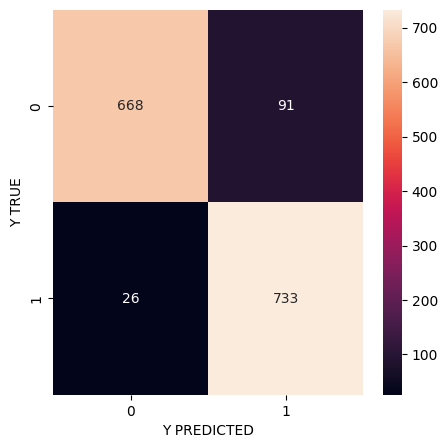

In [66]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(CM,annot=True,fmt="d")
plt.ylabel("Y TRUE")
plt.xlabel("Y PREDICTED")
plt.show()

In [67]:
import pickle

In [68]:
with open("Stroke.pickle4","wb") as sp:
    pickle.dump((cv,model),sp)

In [69]:
with open("Stroke.pickle4","rb") as f:
    trans,mod=pickle.load(f)

In [70]:
import json

In [71]:
with open("brain.json", "w") as json_file:
    json.dump(dic, json_file)

In [72]:
with open("brain.json", "r") as json_fil:
    loaded_data = json.load(json_fil)

In [73]:
kl={"features":["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"]}

In [74]:
with open("feature2.json", "w") as json_fi:
    json.dump(kl, json_fi)

In [75]:
with open(r"feature2.json", "r") as json_fil:
    loaded_feature = json.load(json_fil)

In [76]:
model.score(x_train,y_train)

0.9596242584047462